In [7]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\jedva\OneDrive\Desktop\Portfolio Project\Python\movies.csv')

In [8]:
# Looking at the data itself

df.head ()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# Checking if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
# Checking the data type

df.dtypes

In [68]:
# To show the top 20 data for all

pd.set_option('display.max_rows', 20)

In [30]:
# To show duplicates in the data

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

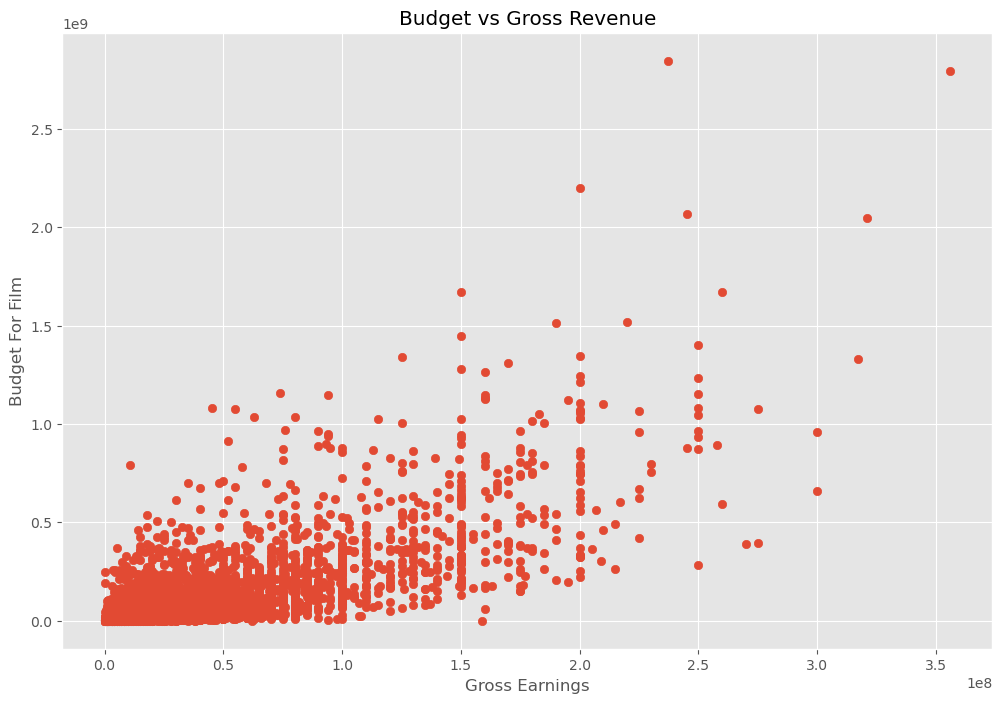

In [37]:
# Scatter plot of budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

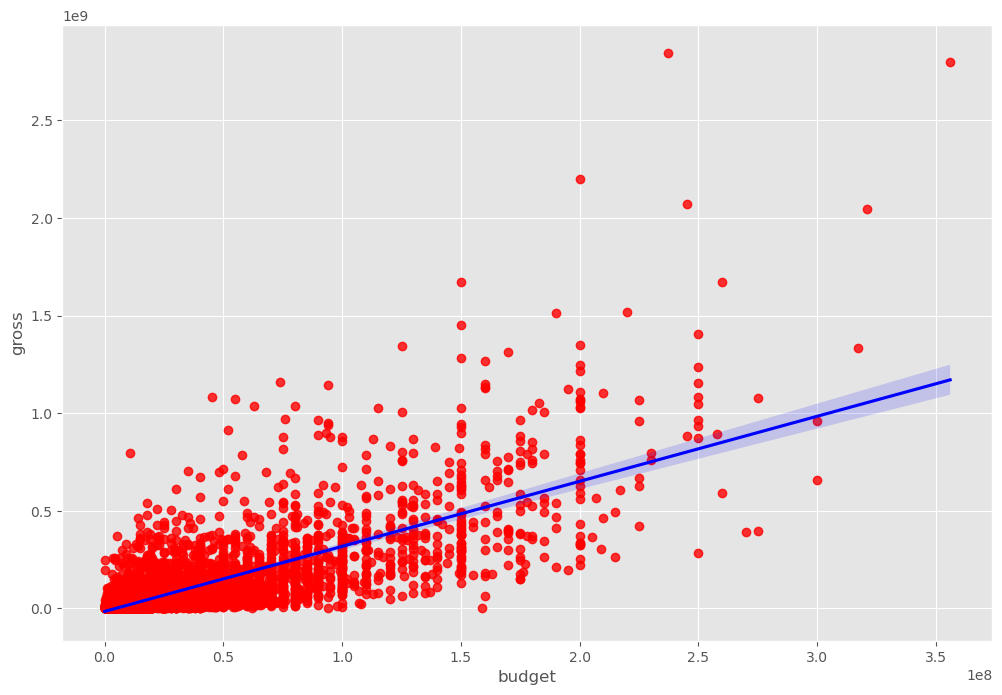

In [39]:
# Plotting of budget vs gross using seaborn (Regression Analysis)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"} )

In [51]:
# Looking at the data types

print(df.dtypes)

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object


In [48]:
# Changing float64 data to int64 for correlation

for column in df.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Replace NaN values with 0
        df[column] = df[column].fillna(0)
        # Convert column to integer type
        df[column] = df[column].astype('int64')


In [56]:
# Looking at the correlation matrix of numeric columns


numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')

print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.091429  0.222427  0.309212  0.261900  0.116358
score    0.091429  1.000000  0.391952  0.053473  0.177451  0.379436
votes    0.222427  0.391952  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.053473  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.177451  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.379436  0.306984  0.268372  0.244339  1.000000


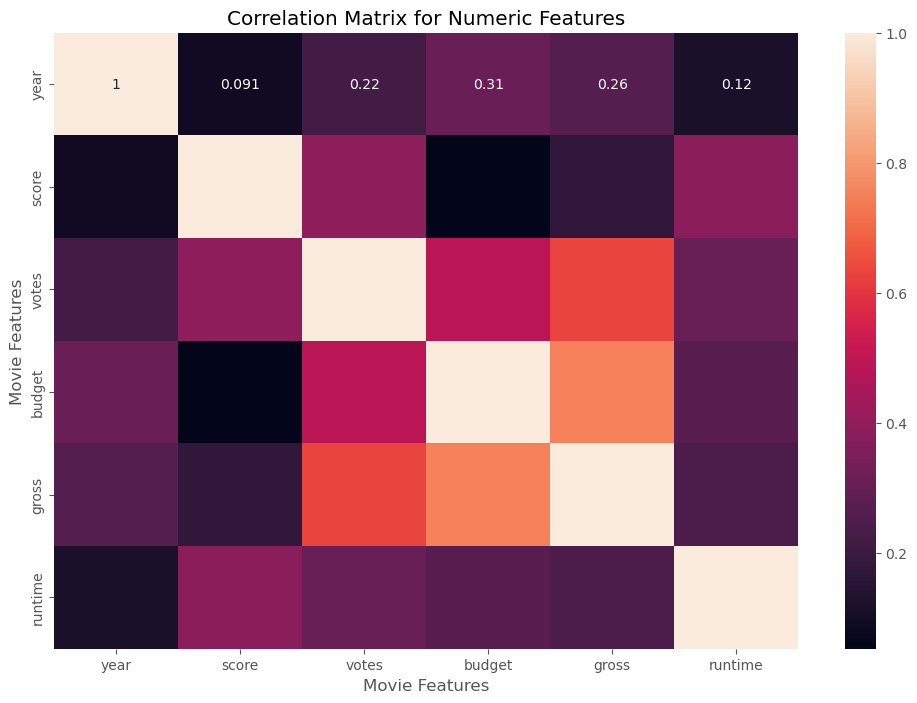

In [79]:
# Creationg a heatmap of the correlation matrix

correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [69]:
# Looking at the company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [78]:
# Coverting object to categories to have a numeric representation

df_numerized = df.copy()  # Create a copy of the original DataFrame

# Iterate over each column
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':  # Check if column is of type 'object' (i.e., categorical)
        df_numerized[col_name] = df_numerized[col_name].astype('category')  # Convert column to categorical type
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # Encode the categorical column to numerical codes

print(df_numerized)


      name  rating  genre  year  released  score    votes  director  writer  \
0     6587       6      6  1980      1705      8   927000      2589    4014   
1     5573       6      1  1980      1492      5    65000      2269    1632   
2     5142       4      0  1980      1771      8  1200000      1111    2567   
3      286       4      4  1980      1492      7   221000      1301    2000   
4     1027       6      4  1980      1543      7   108000      1054     521   
...    ...     ...    ...   ...       ...    ...      ...       ...     ...   
7663  3705      -1      6  2020      2964      3       18      1500    2289   
7664  1678      -1      4  2020      1107      4       36       774    2614   
7665  4717      -1      6  2020       193      5       29      2061    2683   
7666  2843      -1      6  2020      2817      0        0      1184    1824   
7667  5394      -1     10  2020       391      5        7      2165    3344   

      star  country    budget      gross  company  

In [82]:
# Comparing it to the original data

df.head ()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


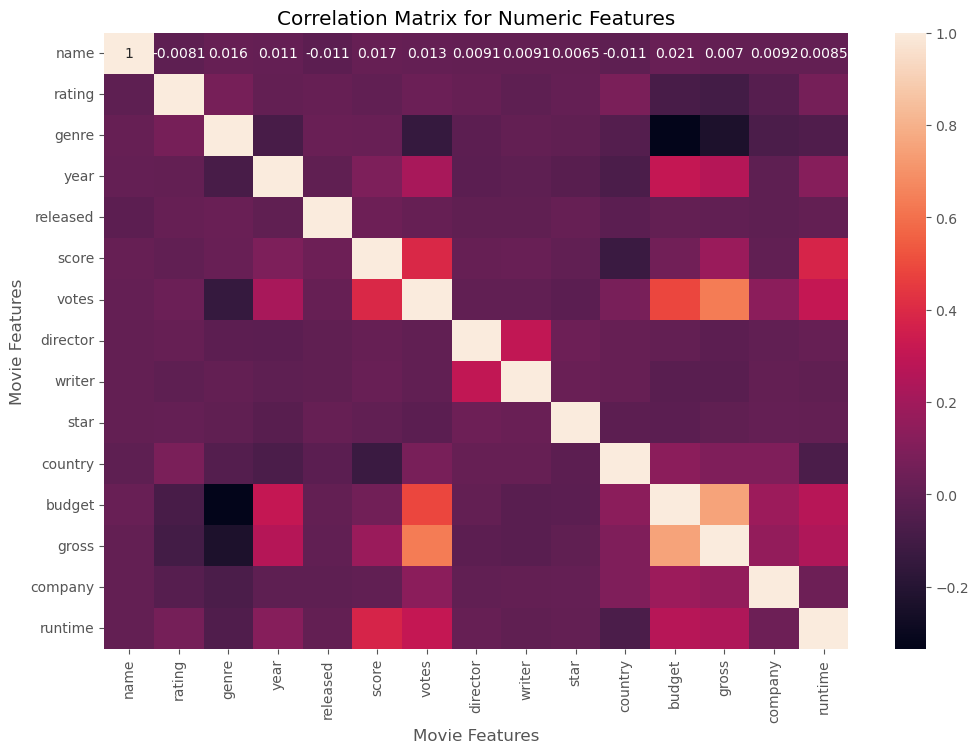

In [80]:
# Creating a heatmap of all values

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [83]:
# To show the correlation of all values

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017191,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.002753,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.023134,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.091429,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.038676,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
score,0.017191,0.002753,0.023134,0.091429,0.038676,1.000000,0.391952,0.017562,0.022961,-0.000075,-0.125743,0.053473,0.177451,0.002977,0.379436
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.391952,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.017562,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022961,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000075,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418


In [86]:
# Checking the correlation of pairs 

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64


In [88]:
# Sorting it

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.334021
budget   genre     -0.334021
gross    genre     -0.234297
genre    gross     -0.234297
votes    genre     -0.145296
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [89]:
# Checking the values with high correlation of 0.5

high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

votes     gross       0.632870
gross     votes       0.632870
          budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has no correlation 